# A.2 Datos abiertos de la CDMX
La Agencia Digital de Innovación Pública tiene disponibles los datos georeferenciados de
las carpetas de investigación aportados por la PGJ . La tabla está disponible aquí:
https://datos.cdmx.gob.mx/explore

1) ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es
necesario hacerlas. Sólo describe la prueba y qué te dice cada una.

2) ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los
datos?

3) ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos
más frecuentes?

4) Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten
cuidado con los delitos con pocas ocurrencias).

5) ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees
que sea esto?

6) Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

7) ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día
de la semana, quincenas)?

8) ¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que
suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las
demás.

9) Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para
cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de
población no esté actualizado).

a) Pinta un mapa con este indicador. Describe los resultados.

10) ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel
de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

11) Con alguna de las medidas de crimen que calculaste en los incisos anteriores,
encuentra patrones de concentración geográfica de delitos (hint: puedes usar
algoritmos de Machine Learning no supervisados).

a) ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en
común?

12) Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público
con y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren
estos delitos?

## Respuestas


# 1) 
Para asegurar la calidad de la información me fijaría primero en la proporción de renglones que tienen valores faltantes en cada una de las columnas.

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [53]:
delitos = pd.read_csv('/Users/sebastianquintanilla/Downloads/carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv',sep=';',parse_dates=['fecha_hechos'])

# 2) 
La tabla tiene 851 010 delitos registrados, que sucedieron entre el 02/06/1906 y el 31/08/2019.

In [54]:
delitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851010 entries, 0 to 851009
Data columns (total 18 columns):
ao_hechos               850807 non-null float64
mes_hechos              850807 non-null object
fecha_hechos            851010 non-null object
delito                  851010 non-null object
categoria_delito        851010 non-null object
fiscalia                851010 non-null object
agencia                 851010 non-null object
unidad_investigacion    850785 non-null object
alcaldia_hechos         847924 non-null object
colonia_hechos          817568 non-null object
ao_inicio               851010 non-null int64
mes_inicio              851010 non-null object
fecha_inicio            851010 non-null object
calle_hechos            848678 non-null object
calle_hechos2           343694 non-null object
longitud                818323 non-null float64
latitud                 818323 non-null float64
geopoint                818323 non-null object
dtypes: float64(3), int64(1), object(14)


In [55]:
delitos['fecha_hechos'] = pd.to_datetime(delitos['fecha_hechos'], errors='coerce')

primero = delitos['fecha_hechos'].min()
ultimo = delitos['fecha_hechos'].max(skipna = True)

print(primero)
print(ultimo)

1906-06-02 19:00:00
2019-08-31 23:04:00


# 3) 
Las categorias de delitos tienen la siguiente distribución:

In [56]:
n = len(delitos)
print('Porcentajes de las distintas categorias de delitos en CDMX')
print(delitos['categoria_delito'].value_counts()/n*100)

Porcentajes de las distintas categorias de delitos en CDMX
DELITO DE BAJO IMPACTO                                     76.196049
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA        5.933185
HECHO NO DELICTIVO                                          5.813680
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                        5.562332
ROBO A NEGOCIO CON VIOLENCIA                                1.649099
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA       1.115498
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                       0.957803
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO               0.832188
HOMICIDIO DOLOSO                                            0.577079
VIOLACIÓN                                                   0.399173
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA     0.372851
ROBO A CASA HABITACIÓN CON VIOLENCIA                        0.235602
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA     0.185779
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCI

Podemos ver que los 5 tipos de delito mas frecuentes son:
- Delito de bajo impacto.
- Robo a transeúnte en vía pública con y sin violencia.
- Hecho no delictivo.
- Robo de vehículo con y sin violencia.
- Robo a negocio con violencia.


# 4) 
Para verificar que delitos van a la alza y cuales a la baja, calculamos la proporción de delitos por categoria tanto en el último año como en el resto de la tabla. Vamos a considerar el último año del 01/09/2018 al 31/08/2019 (ya que esta es la última fecha reportada).


In [57]:
#comenzamos marcando en cada renglón si el delito ocurrió o no en el último año
def ultimo(row):
    '''esta funcion marca con 1 los delitos que ocurrieron en el ultimo año
    0 los delitos que ocurrieron antes
    -1 los delitos que no tienen fecha reportada
    '''
    if np.isnan(row['ao_hechos']):
        row['ultimo'] = -1
    elif row['fecha_hechos'] >= datetime.datetime(2018,9,1):
        row['ultimo'] = 1
    else:
        row['ultimo'] = 0
    return row
        
#aplicamos la función a nuestra base de datos, lo cual añade la columna ultimo
delitos = delitos.apply(ultimo, axis=1)

In [50]:
# delitos.to_csv('delitos.csv')
# delitos = pd.read_csv('/Users/sebastianquintanilla/delitos.csv')

In [93]:
# hacemos una tabla que tenga el conteo de delitos por categoria, separando el último año y 
# todos los años anteriores
mini = delitos[delitos['ultimo'] >= 0][['categoria_delito','ultimo']]
df = pd.DataFrame(mini.groupby(['ultimo','categoria_delito']).size())

In [109]:
# contamos el total de delitos en el año pasado y en todos los años anteriores
total_antes = df.loc[0].sum()
total_2019 = df.loc[1].sum()


print('Porcentaje de delitos por categoría en el último año')
df.loc[1]/total_2019*100

Porcentaje de delitos por categoría en el último año


,0
categoria_delito,
DELITO DE BAJO IMPACTO,75.177114
HECHO NO DELICTIVO,2.152234
HOMICIDIO DOLOSO,0.662291
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,0.800792
ROBO A CASA HABITACIÓN CON VIOLENCIA,0.314777
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,0.254340
ROBO A NEGOCIO CON VIOLENCIA,2.346976
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,0.491472
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,0.149414


In [110]:
print('Porcentaje de delitos por categoría en años anteriores al último')
df.loc[0]/total_antes*100

Porcentaje de delitos por categoría en años anteriores al último


,0
categoria_delito,
DELITO DE BAJO IMPACTO,76.600173
HECHO NO DELICTIVO,7.231329
HOMICIDIO DOLOSO,0.543962
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,0.844349
ROBO A CASA HABITACIÓN CON VIOLENCIA,0.204720
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,0.159172
ROBO A NEGOCIO CON VIOLENCIA,1.377536
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,0.326834
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,0.076729


In [125]:
# Restando las dos tablas anteriores podemos ver cuales categorias de delitos han bajado en 
# porcentaje.

df2 = (df.loc[1]/total_2019 - df.loc[0]/total_antes)/(df.loc[0]/total_2019)*100
df2.sort_values(0, ascending = False ,inplace=True)
print('Porcentaje de cambio en la proporcion de crimenes en 2019 contra años anteriores')
df2



Porcentaje de cambio en la proporcion de crimenes en 2019 contra años anteriores


,0
categoria_delito,
SECUESTRO,43.769153
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,36.847167
ROBO A NEGOCIO CON VIOLENCIA,27.374114
ROBO A REPARTIDOR CON Y SIN VIOLENCIA,26.141984
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,24.572244
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,23.581089
VIOLACIÓN,23.482983
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,23.256332
ROBO A CASA HABITACIÓN CON VIOLENCIA,20.911098


En la tabla anterior podemos ver el porcentaje de cambio de las proporciones de las distintas categorias de delitos entre el año pasado con los años anteriores al pasado.

Por ejemplo, en la primera fila vemos que la proporcion de secuestros entre la cantidad total de delitos tuvo un aumento del 43.77% el año pasado respecto a años anteriores. Es decir, el delito de "secuestro" fue un 43.77% más común entre los delitos del año pasado de lo que había sido entre todos los delitos de años anteriores. También el año pasado la proporción de "Hechos no delictivos" que se reportaron tuvo una disminución del 27.32%.

De esta forma vemos que los delitos que van a la alza en el año pasado son :
- SECUESTRO
- ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA	
- ROBO A NEGOCIO CON VIOLENCIA	
- ROBO A REPARTIDOR CON Y SIN VIOLENCIA	
- ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA	
- ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA
- VIOLACIÓN	
- ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA
- ROBO A CASA HABITACIÓN CON VIOLENCIA	
- ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA	
- HOMICIDIO DOLOSO
- ROBO DE VEHÍCULO CON Y SIN VIOLENCIA.

Los delitos que fueron a la baja el año pasado son:
- DELITO DE BAJO IMPACTO	
- LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO	
- ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA
- HECHO NO DELICTIVO

Resulta interesante observar que en la mayoría de categorias de delitos se reportaron mas delitos el año pasado que en años anteriores.

# 5) 
En la variable 'alcaldia_hechos' hay 442 valores distintos, mientras que la CDMX está dividida en 16 alcaldías. Si tomamos unicamente los 16 valores mas comunes estos corresponden a las alcaldias de la CDMX (los demas son municipios de otros estados).

La alcaldia con más delitos es la Cuauhtemoc, y la que tiene menos es Milpa Alta.
El centro histórico de la ciudad de México se encuentra en la alcaldía Cuauhtemoc, la gran actividad comercial de esta zona podría explicar la alta cantidad de delitos en esta alcaldía.

Por otro lado, según datos del INEGI (2015), Milpa Alta y Cuajimalpa son las 2 alcaldías menos pobladas (137 mil y 199 mil habitantes respectivamente). Vemos que estas son las 2 alcaldías con menos delitos. Además, las alcaldías mas habitadas son Iztapalapa y Gustavo A. Madero, las cuales están en los lugares 2 y 3 con más delitos.

In [134]:
delitos['alcaldia_hechos'].value_counts().head(16)

CUAUHTEMOC                137945
IZTAPALAPA                126807
GUSTAVO A MADERO           84268
BENITO JUAREZ              73907
COYOACAN                   56966
MIGUEL HIDALGO             56571
ALVARO OBREGON             55650
VENUSTIANO CARRANZA        48766
TLALPAN                    48711
AZCAPOTZALCO               41264
IZTACALCO                  36018
XOCHIMILCO                 25893
TLAHUAC                    19292
LA MAGDALENA CONTRERAS     12708
CUAJIMALPA DE MORELOS      11991
MILPA ALTA                  5462
Name: alcaldia_hechos, dtype: int64

# 6)
De nuevo vamos a fijarnos unicamente en las 16 alcaldias de la CDMX.

In [136]:
alc_cdmx = ['CUAUHTEMOC', 'IZTAPALAPA', 'GUSTAVO A MADERO', 'BENITO JUAREZ', 'COYOACAN', 'MIGUEL HIDALGO', 'ALVARO OBREGON', 'VENUSTIANO CARRANZA', 'TLALPAN', 'AZCAPOTZALCO', 'IZTACALCO', 'XOCHIMILCO', 'TLAHUAC', 'LA MAGDALENA CONTRERAS', 'CUAJIMALPA DE MORELOS', 'MILPA ALTA']

delitos_cdmx = delitos[delitos['alcaldia_hechos'].isin(alc_cdmx)]

In [147]:
cols = pd.DataFrame(delitos_cdmx.groupby(['alcaldia_hechos','colonia_hechos']).size())
cols.sort_values(0, ascending = False ,inplace=True)
for a in alc_cdmx:
    print('3 colonias con mas delitos en ' + a +":")
    print(cols.loc[a].head(3))
    print(' ')

3 colonias con mas delitos en CUAUHTEMOC:
                    0
colonia_hechos       
CENTRO          30072
DOCTORES        17543
ROMA NORTE      10886
 
3 colonias con mas delitos en IZTAPALAPA:
                                   0
colonia_hechos                      
CENTRAL DE ABASTO               5559
LOMAS DE SAN LORENZO            3248
DESARROLLO URBANO QUETZALCOATL  3171
 
3 colonias con mas delitos en GUSTAVO A MADERO:
                        0
colonia_hechos           
LINDAVISTA           3917
GUADALUPE TEPEYAC    3378
SAN FELIPE DE JESÚS  2417
 
3 colonias con mas delitos en BENITO JUAREZ:
                      0
colonia_hechos         
DEL VALLE CENTRO  13221
NARVARTE           9711
PORTALES SUR       4801
 
3 colonias con mas delitos en COYOACAN:
                              0
colonia_hechos                 
PEDREGAL DE SANTO DOMINGO  4704
AJUSCO                     2519
DEL CARMEN                 2484
 
3 colonias con mas delitos en MIGUEL HIDALGO:
                      

Arriba podemos ver las 3 colonias con mas delitos por cada alcaldía. De acuerdo con lo especulado en la pregunta 5, la colonia Centro es la que tiene mas delitos dentro de la alcaldía Cuauhtémoc.

# 7)
El mes de mayo es el que tiene más delitos registrados. Notemos que a finales y principios de año hay menos delitos (enero, febrero, noviembre y diciembre), mientras que los mese a mitad de año tienen más delitos (de marzo a agosto). Septiembre es el mes con menos delitos, sería interesante investigar a que se debe esto.

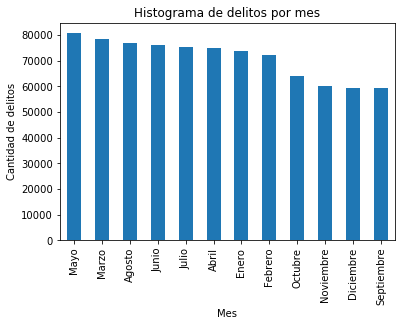

In [166]:
delitos['mes_hechos'].value_counts().plot(kind='bar')
plt.ylabel('Cantidad de delitos')
plt.xlabel('Mes')
plt.title('Histograma de delitos por mes')
plt.show()

Si hacemos un conteo por día de la semana, vemos que el viernes es el día con más delitos, mientras que domingo y sábado son los días menos delictivos. Los demás días de la semana tienen aproximadamente la misma cantidad de delitos.
Quizás esto se deba a que el viernes suele ser el día de pago para la mayor parte de los empleados, mientras que los fines de semana son días con menos actividad.

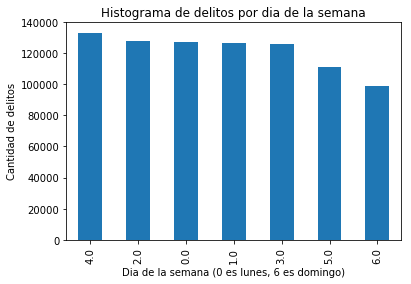

In [167]:
delitos['fecha_hechos'].dt.dayofweek.value_counts().plot(kind='bar')
plt.ylabel('Cantidad de delitos')
plt.xlabel('Dia de la semana (0 es lunes, 6 es domingo)')
plt.title('Histograma de delitos por dia de la semana')
plt.show()

Con un conteo por día de la semana vemos que la mayor cantidad de delitos suceden el día primero del mes, seguido por el día 15. De nuevo, para la mayoria de los empleados estos son los días de pago. Además el día 31 es el día con menos delitos, sin embargo, no todos los meses tienen día 31, así que si ignoramos los días 30 y 31 (cuya información podríamos juntar) vemos que el día 29 es el que tiene menos delitos.

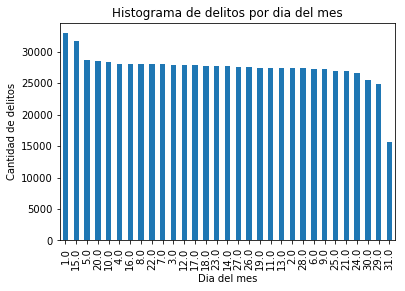

In [164]:
delitos['fecha_hechos'].dt.day.value_counts().plot(kind='bar')
plt.ylabel('Cantidad de delitos')
plt.xlabel('Dia del mes')
plt.title('Histograma de delitos por dia del mes')
plt.show()

# 8)
De nuevo solo nos fijamos en las 16 alcaldías de la CDMX.


In [128]:
delitos.head()

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,ultimo
0,2016.0,Diciembre,2016-12-31 22:11:00,HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (ATRO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLAHUAC,TLH-1,UI-2SD,TLAHUAC,SANTA ANA PONIENTE,2017,Enero,2017-01-01 00:37:27,AVENIDA TLAHUAC,TURANDOT,-99.053535,19.302084,"19.3020842299,-99.0535354187",0
1,2016.0,Diciembre,2016-12-31 19:55:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-2SD,IZTAPALAPA,UNIDAD MODELO,2017,Enero,2017-01-01 01:29:37,RIO CHURUBUSCO,NaN,-99.128550,19.363062,"19.3630615318,-99.1285499097",0
2,2017.0,Enero,2017-01-01 01:15:00,LESIONES INTENCIONALES POR ARMA BLANCA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2CD,CUAUHTEMOC,CENTRO,2017,Enero,2017-01-01 02:01:49,AVENIDA ANILLO DE CIRCUNVALACION,FRAY SERVANDO TERESA DE MIER,-99.125428,19.427148,"19.4271484491,-99.1254284961",0
3,2017.0,Enero,2017-01-01 00:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2CD,CUAUHTEMOC,DOCTORES,2017,Enero,2017-01-01 02:55:04,AVENIDA EJE CENTRAL Y DOCTOR MARQUEZ,NaN,-99.144286,19.410851,"19.410850532,-99.1442862319",0
4,2011.0,Agosto,2011-08-17 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-2SD,CUAUHTEMOC,DOCTORES,2017,Enero,2017-01-01 03:23:31,AV. NIÑOS HEROES,NaN,-99.150120,19.421071,"19.4210705569,-99.1501195725",0


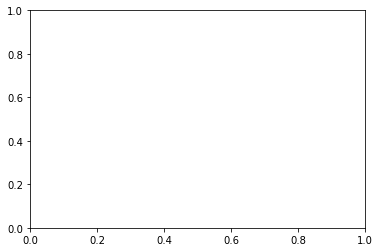

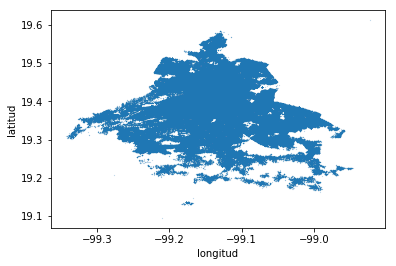

In [15]:
delitos.plot.scatter(x='longitud',y='latitud',s=0.01)
plt.show()

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
71769,2018.0,Enero,2018-01-31 22:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-2SD,IZTACALCO,GABRIEL RAMOS MILLÁN SECCIÓN BRAMADERO,2018,Febrero,2018-02-01 00:02,SUR 173,ORIENTE 106,-99.092764,19.392147,"19.3921465472,-99.0927635623"
71770,2018.0,Enero,2018-01-26 00:30,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN ÁLVARO OBREGÓN,AO-1,UI-2SD,ALVARO OBREGON,TOLTECA,2018,Febrero,2018-02-01 00:16,CALLE 4,NaN,-99.190938,19.391116,"19.3911155416,-99.1909377935"
71771,2018.0,Enero,2018-01-31 15:55,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN ÁLVARO OBREGÓN,AO-3,UI-2CD,ALVARO OBREGON,SAN ANGEL,2018,Febrero,2018-02-01 00:23,AVENIDA INSURGENTES,CERRADA RELOX,-99.189743,19.341298,"19.341297891,-99.1897428595"
71772,2018.0,Enero,2018-01-31 21:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN ÁLVARO OBREGÓN,AO-3,UI-2CD,ALVARO OBREGON,SAN BARTOLO AMEYALCO,2018,Febrero,2018-02-01 00:25,1RA CDA DE FRANCISCO Y MADERO,NaN,-99.277366,19.333733,"19.3337332877,-99.2773659453"
71773,2018.0,Enero,2018-01-31 22:04,HOMICIDIO CULPOSO POR ARMA DE FUEGO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-2CD,IZTAPALAPA,AMPLIACION SAN MIGUEL 8VA.,2018,Febrero,2018-02-01 00:54,ERMITA IZTAPALAPA,FUNDICION,-99.078419,19.352533,"19.3525333937,-99.0784193881"
71774,2018.0,Enero,2018-01-31 21:00,AMENAZAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-2CD,IZTAPALAPA,LOS ÁNGELES,2018,Febrero,2018-02-01 01:27,AV. DEL ROSAL,NaN,-99.068366,19.345088,"19.3450880572,-99.068365576"
71775,2018.0,Enero,2018-01-31 22:00,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-5,UI-2SD,CUAUHTEMOC,SAN RAFAEL,2018,Febrero,2018-02-01 01:35,MAESTRO ANTONIO CASO,MANUEL ALTAMIRANO,-99.163484,19.435167,"19.4351668872,-99.163484411"
71776,2018.0,Febrero,2018-02-01 00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-3,UI-1SD,GUSTAVO A MADERO,JUVENTINO ROSAS,2018,Febrero,2018-02-01 01:40,VICENTE GUERRERO,MARIANO ABASOLO,-99.134893,19.562634,"19.5626339979,-99.1348925005"
71777,2018.0,Enero,2018-01-31 22:40,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MAGDALENA CONTRERAS,MC-1,UI-2SD,LA MAGDALENA CONTRERAS,CUAUHTÉMOC,2018,Febrero,2018-02-01 01:55,AV LUIS CABRERA,NaN,-99.243422,19.322185,"19.3221848186,-99.2434217391"
71780,2018.0,Enero,2018-01-26 14:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2SD,CUAUHTEMOC,CENTRO,2018,Febrero,2018-02-01 02:07,AV. JUAREZ,NaN,-99.143192,19.434611,"19.4346111961,-99.1431916664"


datetime.datetime(2018, 9, 1, 0, 0)